# **Introdução ao NLP**

## **Classificação de textos**

Vamos criar um modelo de ML para classificação de sentimentos: 
> a pessoa gostou ou não gostou daquele filme/notícia/música?

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
dir_data = '/content/drive/My Drive/Colab Notebooks/Machine Learning - Alura Tech/Dataset/Lecture 2.1/'
movies_report = pd.read_csv(dir_data+'imdb-reviews-pt-br.csv')
movies_report

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg
...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    movies_report['text_pt'], movies_report['sentiment'],
    train_size=0.75, random_state=0)

In [0]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
score = logistic_model.score(x_test, y_test)
score

ValueError: ignored

_ValueError: could not convert string to float_
> Precisamos traduzir a nossa linguagem textual para números, de modo que a computador possa fazer os cálculos e nos forneça respostas para os nossos problemas

Explorando os dados

In [0]:
print("Resenha negativa\n")
movies_report['text_pt'][1]

Resenha negativa



'Este é um exemplo do motivo pelo qual a maioria dos filmes de ação são os mesmos. Genérico e chato, não há nada que valha a pena assistir aqui. Um completo desperdício dos talentos de Ice-T e Cubo de Gelo que foram mal aproveitados, cada um comprovando que são capazes de atuar e agir bem. Não se incomode com este, vá ver New Jack City, Ricochet ou assistir New York Undercover para Ice-T, ou Boyz no Hood, Higher Learning ou Friday for Ice Cube e ver o negócio real. Ice-Ts horrivelmente clichê diálogo sozinho faz este filme ralar os dentes, e eu ainda estou me perguntando o que diabos Bill Paxton estava fazendo neste filme? E por que diabos ele sempre interpreta exatamente o mesmo personagem? Dos extraterrestres em diante, todos os filmes que eu vi com Bill Paxton o fizeram interpretar exatamente o mesmo personagem irritante, e pelo menos em Aliens seu personagem morreu, o que o tornou um pouco gratificante ... No geral, esse é lixo de ação de segunda classe. Existem incontáveis \u200b\

In [0]:
print("Resenha positiva\n")
movies_report['text_pt'][49100]

Resenha positiva



'Este filme parece ser uma série de filmes para crianças que os pais podem assistir com pesar aos seus filhos mais entretidos. O filme parece e é principalmente voltado para crianças, mas não para neste nível. Eu assisti esse filme primeiro quando criança e achei engraçado, divertido e reconfortante e não o vi de novo por vários anos. Eu assisti novamente recentemente aos 18 anos e achei que era quase tão engraçado, mas tão comovente e divertido. Este filme é altamente subestimado e contém muitas mensagens da vida real. Este filme é uma história de busca inspiradora que é feita para crianças ainda épica por si só. Eu recomendo este filme para qualquer pessoa de qualquer idade.'

In [0]:
movies_report['sentiment'].value_counts()

neg    24765
pos    24694
Name: sentiment, dtype: int64

Definindo o sentimento/classificação como uma variável binária: 0, 1

In [0]:
sentiment_bin = movies_report['sentiment'].replace(['neg', 'pos'], [0,1])
movies_report['sentiment_bin'] = sentiment_bin
movies_report

,id,text_en,text_pt,sentiment,sentiment_bin
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0
...,...,...,...,...,...
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1


## **Bag of words**

> Como classificar um sentimento por linguagem textual?


 * Precisamos converter o texto (conjunto de strings) em números. Como?
 1. Criando um vocabulário geral que represente bem todo a amostra
 2. Contar quantas vezes cada palavra do vocabulário aparece naquele texto e construir um vetor de contagem
 3. Modelar a relação entre os vetores de contagem com as targets: avaliação positiva ou negativa

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(lowercase=False)

In [0]:
text_example = ['Assisti um filme ótimo', 'Assisti um filme péssimo']
bag_example = vectorizer.fit_transform(text_example)
bag_example

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

Note que _bag_ é uma matriz sparsa, ou seja, com muitos elementos nulos.

> Logo ela armazena somente as posições e os valores dos elementos não-nulos

In [0]:
print(bag_example)

  (0, 0)	1
  (0, 3)	1
  (0, 1)	1
  (0, 4)	1
  (1, 0)	1
  (1, 3)	1
  (1, 1)	1
  (1, 2)	1


In [0]:
vectorizer.get_feature_names()

['Assisti', 'filme', 'péssimo', 'um', 'ótimo']

In [0]:
vocabulary_example = pd.DataFrame.sparse.from_spmatrix(bag_example, columns=vectorizer.get_feature_names())
vocabulary_example

,Assisti,filme,péssimo,um,ótimo
0,1,1,0,1,1
1,1,1,1,1,0


In [0]:
vectorizer = CountVectorizer(lowercase=False)
bag_movies = vectorizer.fit_transform(movies_report['text_pt'])
bag_movies.shape

(49459, 156923)

**Temos uma matriz enorme!**
* processo muito custoso computacionalmente (tempo e memória)
* como solucionar isso? 
> definindo um número máximo de features e sem fazer distinção entre lower/upper

Vamos montar o _bag of words_ com as 100 palavras mais frequentes do corpus

In [0]:
max_features = 100
vectorizer = CountVectorizer(lowercase=True, max_features=max_features)
bag_movies = vectorizer.fit_transform(movies_report['text_pt'])
bag_movies.shape

(49459, 100)

In [0]:
bag_of_words = pd.DataFrame.sparse.from_spmatrix(bag_movies, columns=vectorizer.get_feature_names())
bag_of_words

,ainda,algumas,alguns,anos,ao,apenas,as,assistir,até,bem,bom,coisa,com,como,da,das,de,depois,dizer,do,dos,ela,ele,eles,em,enredo,então,era,esse,estava,este,está,eu,faz,fazer,filme,filmes,final,foi,grande,...,para,parece,parte,pelo,personagens,pessoas,pode,poderia,por,porque,pouco,qualquer,quando,que,realmente,se,sem,ser,seu,seus,sobre,sua,suas,são,também,tem,tempo,ter,the,todo,todos,tudo,tão,um,uma,ver,vez,vi,vida,você
0,0,0,0,0,1,0,0,0,1,1,0,0,2,1,0,2,4,1,0,4,2,0,1,0,0,0,0,1,0,0,0,0,3,0,1,1,0,0,0,0,...,1,1,0,0,1,0,0,0,2,0,0,1,2,7,0,0,1,1,2,0,1,0,0,0,0,1,1,0,0,0,0,1,0,3,2,0,1,0,0,0
1,1,0,0,0,0,0,0,3,0,2,0,1,2,0,0,0,7,0,0,1,3,0,1,0,3,0,0,1,2,1,3,0,2,1,0,4,3,0,1,0,...,2,0,0,2,0,0,0,0,1,0,1,0,0,10,1,2,0,0,1,0,0,0,0,2,0,1,0,0,0,0,1,0,0,5,2,4,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,3,1,0,0,10,0,0,2,0,0,0,2,1,1,0,0,0,0,0,2,2,0,0,3,0,0,0,1,...,1,0,1,0,1,1,0,0,2,0,0,0,1,8,0,1,4,0,0,0,0,0,1,3,1,0,0,0,0,1,1,2,1,3,2,0,1,0,0,2
3,1,0,0,1,0,1,4,0,2,1,0,0,7,2,1,0,13,0,0,3,1,0,1,2,6,0,1,1,1,1,3,0,10,0,0,4,2,0,1,0,...,4,0,0,0,1,0,0,0,1,0,0,0,2,7,0,3,0,0,0,0,0,0,1,2,0,1,1,1,0,1,2,0,0,7,4,1,0,1,0,1
4,0,1,0,0,0,1,2,1,0,1,0,0,3,0,1,0,16,0,0,2,1,4,0,2,2,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,...,5,0,0,1,0,0,0,0,0,0,0,0,0,4,2,1,1,1,0,0,0,1,2,4,0,0,0,0,0,0,0,0,0,3,4,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49454,0,1,0,0,3,0,0,1,0,1,0,0,0,2,1,0,5,0,0,1,0,0,0,0,2,0,0,1,1,1,1,0,3,0,0,3,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,2,1,0,0,0,0,0
49455,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,1,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
49456,0,1,1,1,0,0,1,1,2,2,1,2,3,8,1,1,15,1,0,8,4,0,5,0,5,0,1,2,2,1,4,2,2,0,0,8,5,0,1,0,...,4,0,0,0,0,1,1,0,5,0,1,2,2,13,0,0,0,1,1,0,0,2,0,4,0,1,1,0,1,2,1,1,1,12,3,0,0,1,0,2
49457,0,1,2,4,0,0,2,0,0,0,0,0,2,1,1,0,5,1,0,1,2,0,1,0,2,0,1,1,0,0,1,0,5,0,1,0,0,0,0,0,...,2,0,0,0,0,0,0,0,1,0,1,0,0,6,2,1,0,0,0,0,0,0,2,0,4,1,1,0,0,0,0,0,0,4,1,2,0,0,0,2


Separação das amostras de treino e teste

In [0]:
x_train, x_test, y_train, y_test = train_test_split(
    bag_of_words, movies_report['sentiment_bin'],
    train_size=0.75, random_state=0)

Treinamento supervisionado (target = sentimento) utilizando o modelo de regressão logística (target binaria)

In [0]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
score = logistic_model.score(x_test, y_test)
score

0.7121714516781238

**Como melhorar essa modelagem?**
* As 100 palavras mais frequentes são de fato as mais relevantes para a classificação de sentimento?
* Provavelmente não...

## **Word Cloud**

A visualização gráfica das palavras mais frequentes

Usaremos a biblioteca [WordCloud](https://github.com/amueller/word_cloud)

In [0]:
!pip install wordcloud

Juntar todas as palavras e separar por espaço

In [0]:
all_words = ' '.join([text for text in movies_report['text_pt']])

In [0]:
from wordcloud import WordCloud
cloud = WordCloud(width=800, height=400, max_font_size=110).generate(all_words)

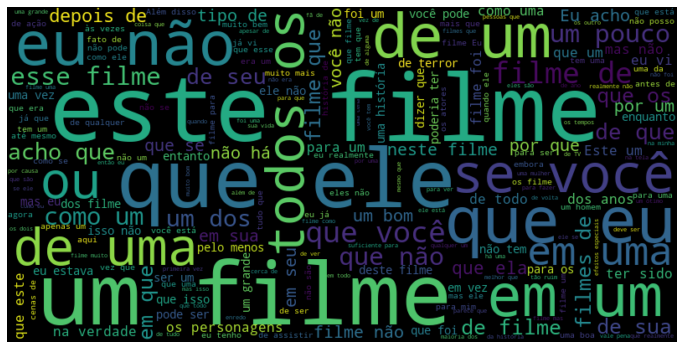

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Note que há várias palavras repetidas. Podemos resolver isso usando a função _collocations_:
> _collocations=False_ remove os bigramas

In [0]:
cloud_nobigram = WordCloud(
    width=800, height=400, max_font_size=110, collocations=False).generate(all_words)


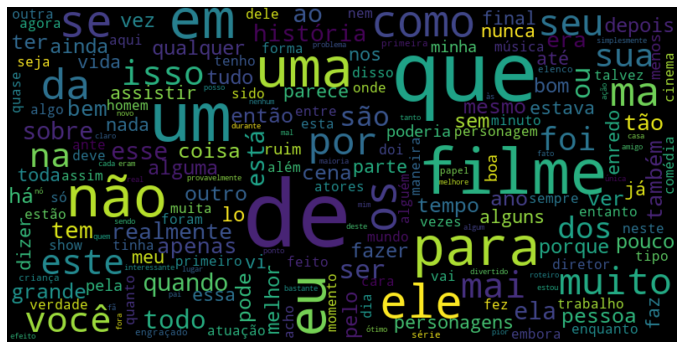

In [0]:
plt.figure(figsize=(12,8))
plt.imshow(cloud_nobigram, interpolation='bilinear')
plt.axis('off')
plt.show()

Ainda não está claro a visualização das palavras importantes para a classificação de sentimentos
> devemos separar em positivo e negativo

In [0]:
movies_report_pos = movies_report.query("sentiment=='pos'")
movies_report_neg = movies_report.query("sentiment=='neg'")

In [0]:
all_words_pos = ' '.join([text for text in movies_report_pos['text_pt']])
cloud_pos = WordCloud(
    width=800, height=400, max_font_size=110, collocations=False).generate(all_words_pos)

**WordCloud positivo**

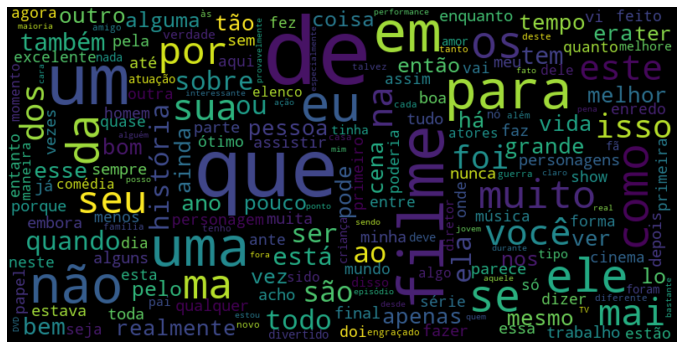

In [0]:
plt.figure(figsize=(12,8))
plt.imshow(cloud_pos, interpolation='bilinear')
plt.axis('off')
plt.show()

In [0]:
all_words_neg = ' '.join([text for text in movies_report_neg['text_pt']])
cloud_neg = WordCloud(
    width=800, height=400, max_font_size=110, collocations=False).generate(all_words_neg)

**WordCloud negativo**

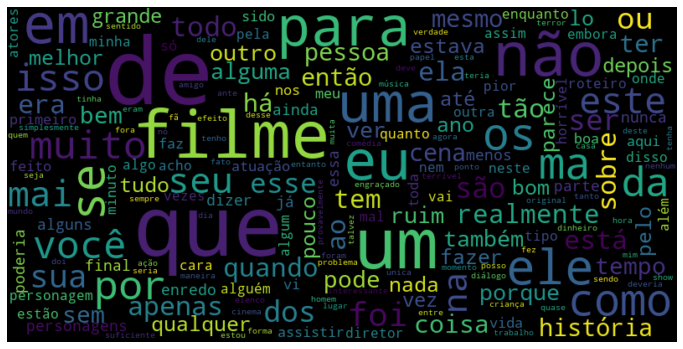

In [0]:
plt.figure(figsize=(12,8))
plt.imshow(cloud_neg, interpolation='bilinear')
plt.axis('off')
plt.show()

## **Intro ao NLTK**

A livraria [NLTK](https://www.nltk.org/) é uma das mais importantes para análises de linguagem natural
> ela se adequa para diferentes idiomas: English, Spanish, Portuguese, French, ...

In [0]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

True

Estudando a frequeância de aparição das palavras com o NLTK

In [0]:
text_example = ['Filme bom', 'O filme foi pessimo']
freq_words = nltk.FreqDist(text_example)
freq_words

FreqDist({'Filme bom': 1, 'O filme foi pessimo': 1})

Ops ... ele calculou a frequência das frases!
> Queremos a frequência das palavras

In [0]:
from nltk import tokenize

phrase = 'Intro to NLTK library'

token_WS = tokenize.WhitespaceTokenizer()
token_phrase = token_WS.tokenize(phrase)
token_phrase

['Intro', 'to', 'NLTK', 'library']

In [0]:
token_dataset = token_WS.tokenize(all_words)
freq_words = nltk.FreqDist(token_dataset)
freq_words


FreqDist({'Mais': 1538,
          'uma': 130888,
          'vez,': 1927,
          'o': 244881,
          'Sr.': 1741,
          'Costner': 50,
          'arrumou': 3,
          'um': 216410,
          'filme': 117543,
          'por': 61339,
          'muito': 51761,
          'mais': 53504,
          'tempo': 10424,
          'do': 101737,
          'que': 325070,
          'necessário.': 135,
          'Além': 3631,
          'das': 16496,
          'terríveis': 576,
          'seqüências': 586,
          'de': 417651,
          'resgate': 152,
          'no': 57145,
          'mar,': 63,
          'quais': 1537,
          'há': 15824,
          'poucas,': 7,
          'eu': 68814,
          'simplesmente': 6436,
          'não': 127915,
          'me': 19136,
          'importei': 109,
          'com': 99174,
          'nenhum': 4531,
          'dos': 41222,
          'personagens.': 1027,
          'A': 31547,
          'maioria': 5565,
          'nós': 3944,
          'tem': 2498

As palavras mais frequentes com o número de contagem

In [0]:
freq_dist = pd.DataFrame({
    'Palavras': list(freq_words.keys()), 'Frequencia': list(freq_words.values())})
most_freq = freq_dist.nlargest(columns='Frequencia', n=10)
most_freq

,Palavras,Frequencia
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410
102,a,210179
45,é,192381
200,em,132778
1,uma,130888
29,não,127915


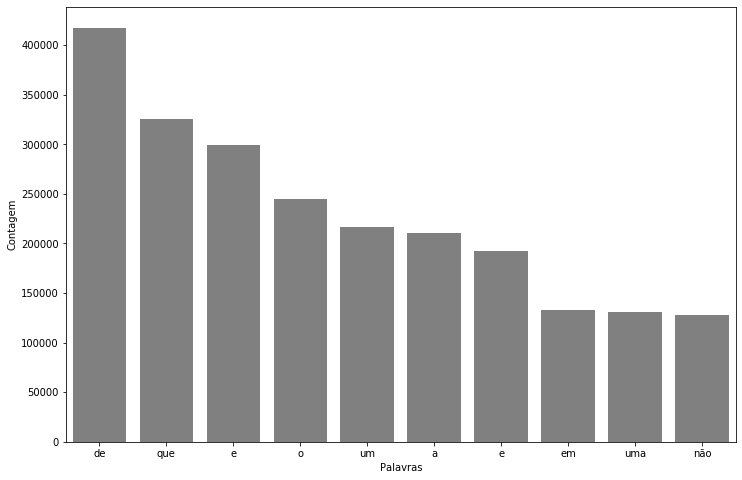

In [0]:
import seaborn as sns
plt.figure(figsize=(12,8))
ax = sns.barplot(data=most_freq,
                 x='Palavras', y='Frequencia', color='gray')
ax.set(ylabel='Contagem')
plt.show()

Note que o _tokenize.WhitespaceTokenizer()_ apresenta uma distribuição de palavras diferente da _WordCloud_ e do _CountVectorizer_ (pareto logo acima)
> esses dois últimos não consideram caracteres únicos (a, o, e, é) e nem pontuação

## **Stop words**

Entretanto, continuamos com o mesmo problema: as palavras mais frequentes não agregam sentido e não nos ajudam a prever o sentimento/avaliação sobre filme. Como removê-las?

A livraria NLTK já tem uma lista dessas palavras "inúteis": as **_stop words_**

In [0]:
stop_words = nltk.corpus.stopwords.words('portuguese')
print(stop_words)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [0]:
def remove_stopwords(all_text, stop_words):

  from nltk import tokenize
  token_WS = tokenize.WhitespaceTokenizer()
  
  # All final texts without stop words
  all_text_final = list()

  for text in all_text:
    # Getting each word from the text
    words_text = token_WS.tokenize(text)
    # This text without stop words
    new_text = list()
    for word in words_text:
      if word not in stop_words:
        new_text.append(word)
    all_text_final.append(' '.join(new_text))

  return all_text_final

In [0]:
movies_report['text_pt_no_stopwords'] = remove_stopwords(movies_report['text_pt'], stop_words)

In [0]:
movies_report['text_pt'][0]

'Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.'

In [0]:
movies_report['text_pt_no_stopwords'][0]

'Mais vez, Sr. Costner arrumou filme tempo necessário. Além terríveis seqüências resgate mar, quais poucas, simplesmente importei nenhum personagens. A maioria fantasmas armário, personagem Costers realizado logo início, esquecido tarde, importava. O personagem deveríamos importar arrogante superconfiante, Ashton Kutcher. O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, bem além meio caminho, Costner conta sobre fantasmas Kutchers. Somos informados Kutcher levado ser melhor pressentimentos presságios anteriores. Nenhuma mágica aqui, tudo podia fazer desligar hora.'

A função abaixo calcula o score da regressão logśitica para NPL

In [0]:
def npl_score(text_list, target_selection, max_features=100):

  vectorizer = CountVectorizer(lowercase=False, max_features=max_features)
  bag_matrix = vectorizer.fit_transform(text_list)
  bag_of_words = pd.DataFrame.sparse.from_spmatrix(bag_matrix, columns=vectorizer.get_feature_names())

  x_train, x_test, y_train, y_test = train_test_split(
      bag_of_words, target_selection, train_size=0.75, random_state=0)

  logistic_model = LogisticRegression()
  logistic_model.fit(x_train, y_train)
  score = logistic_model.score(x_test, y_test)
  return score


Score usando todas as palavras:

In [0]:
max_features=100
npl_score(movies_report['text_pt'], movies_report['sentiment_bin'], max_features)

0.7035988677719369

Score removendo as _stop words_:


In [0]:
npl_score(movies_report['text_pt_no_stopwords'], movies_report['sentiment_bin'], max_features)

0.7145976546704408

Houve uma melhora, mas ainda precisamos aprimorar a seleção das palavras que são de fato importantes na classificação do filme para aumentar a acurácia do nosso modelo.

## **Punctuation**

Há muitos caracteres (,.!?") que aparecem nos textos, mas não contribuem semanticamente na classificação de sentimentos

Exemplo: diferença entre os tipos de tokenização por espaço e por pontuação

In [0]:
frase = "Os curso são ótimos, muito bons!"
token_espaco = tokenize.WhitespaceTokenizer()
token_pontuacao = tokenize.WordPunctTokenizer()

token_1 = token_espaco.tokenize(frase)
token_2 = token_pontuacao.tokenize(frase)

print(token_1)
print(token_2)

['Os', 'curso', 'são', 'ótimos,', 'muito', 'bons!']
['Os', 'curso', 'são', 'ótimos', ',', 'muito', 'bons', '!']


In [0]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [0]:
punct = list()
for i in punctuation:
  punct.append(i)
print(punct)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [0]:
stop_words = stop_words + punct

A função abaixo elimina as pontuações do texto



In [0]:
def remove_punctuation(all_text, punctuation):

  from nltk import tokenize
  token_punct = tokenize.WordPunctTokenizer()
  
  # All final texts without stop words
  all_text_final = list()

  for text in all_text:
    # Getting each word/punctuation from the text
    words_text = token_punct.tokenize(text)
    # This text without punctuation
    new_text = list()
    for word in words_text:
      if word not in punctuation:
        new_text.append(word)
    all_text_final.append(' '.join(new_text))

  return all_text_final

In [0]:
movies_report['text_pt_no_stopwords-punct'] = remove_punctuation(movies_report['text_pt_no_stopwords'], stop_words)

In [0]:
movies_report['text_pt_no_stopwords'][0]

'Mais vez, Sr. Costner arrumou filme tempo necessário. Além terríveis seqüências resgate mar, quais poucas, simplesmente importei nenhum personagens. A maioria fantasmas armário, personagem Costers realizado logo início, esquecido tarde, importava. O personagem deveríamos importar arrogante superconfiante, Ashton Kutcher. O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, bem além meio caminho, Costner conta sobre fantasmas Kutchers. Somos informados Kutcher levado ser melhor pressentimentos presságios anteriores. Nenhuma mágica aqui, tudo podia fazer desligar hora.'

In [0]:
movies_report['text_pt_no_stopwords-punct'][0]

'Mais vez Sr Costner arrumou filme tempo necessário Além terríveis seqüências resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armário personagem Costers realizado logo início esquecido tarde importava O personagem deveríamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armário desordenado Seu único obstáculo parece estar vencendo Costner Finalmente bem além meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos presságios anteriores Nenhuma mágica aqui tudo podia fazer desligar hora'

## **Accentuation**

Algumas _stop words_ ainda não foram removidas pois foram escritas sem acentuação

In [0]:
!pip install unidecode

Removendo os acentos das palavras nas resenhas

In [0]:
import unidecode
movies_report['text_pt_no_stopwords-punct-accent'] = [unidecode.unidecode(text) for text in
                                                     movies_report['text_pt_no_stopwords-punct']]
                                                     

In [0]:
movies_report['text_pt_no_stopwords-punct-accent'][0]

'Mais vez Sr Costner arrumou filme tempo necessario Alem terriveis sequencias resgate mar quais poucas simplesmente importei nenhum personagens A maioria fantasmas armario personagem Costers realizado logo inicio esquecido tarde importava O personagem deveriamos importar arrogante superconfiante Ashton Kutcher O problema sai garoto pensa melhor qualquer outra pessoa redor mostra sinais armario desordenado Seu unico obstaculo parece estar vencendo Costner Finalmente bem alem meio caminho Costner conta sobre fantasmas Kutchers Somos informados Kutcher levado ser melhor pressentimentos pressagios anteriores Nenhuma magica aqui tudo podia fazer desligar hora'

Removendo os acentos das palavras da lista de _stop words_

In [0]:
stop_words = [unidecode.unidecode(word) for word in stop_words]
print (stop_words)

['de', 'a', 'o', 'que', 'e', 'e', 'do', 'da', 'em', 'um', 'para', 'com', 'nao', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'a', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'ja', 'eu', 'tambem', 'so', 'pelo', 'pela', 'ate', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'voce', 'essa', 'num', 'nem', 'suas', 'meu', 'as', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nos', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'voces', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'esta', 'estamos', 'estao', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estavamos', 'estavam', 'estivera', 'estiveramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivessemos', 'estivessem', 'estiver', 'estiv

Removendo dos textos as _stop words_ que foram escritas sem acento

In [0]:
movies_report['text_pt_no_stopwords-punct-accent'] = remove_stopwords(movies_report['text_pt_no_stopwords-punct-accent'], stop_words)

## **Lower case**

Algumas _stop words_ ainda não foram removidas porque no texto elas aparecem em letras maiúsculas

In [0]:
def remove_stopwords_lower(all_text, stop_words):

  from nltk import tokenize
  token_punct = tokenize.WordPunctTokenizer()
  
  # All final texts without stop words
  all_text_final = list()

  for text in all_text:
    # Lower case words
    text = text.lower()
    # Getting each word/punctuation from the text
    words_text = token_punct.tokenize(text)
    # This text without punctuation
    new_text = list()
    for word in words_text:
      if word not in punctuation:
        new_text.append(word)
    all_text_final.append(' '.join(new_text))

  return all_text_final

In [0]:
movies_report['text_pt_no_stopwords-punct-accent-lower'] = remove_stopwords_lower(movies_report['text_pt_no_stopwords-punct-accent'], stop_words)

In [0]:
score_0 = npl_score(movies_report['text_pt'], movies_report['sentiment_bin'])
score_1 = npl_score(movies_report['text_pt_no_stopwords'], movies_report['sentiment_bin'])
score_2 = npl_score(movies_report['text_pt_no_stopwords-punct'], movies_report['sentiment_bin'])
score_3 = npl_score(movies_report['text_pt_no_stopwords-punct-accent'], movies_report['sentiment_bin'])
score_4 = npl_score(movies_report['text_pt_no_stopwords-punct-accent-lower'], movies_report['sentiment_bin'])

0.7035988677719369 0.7145976546704408 0.7138697937727456 0.713303679741205


In [0]:
print('Original text:', score_0)
print('Preprocessing:', score_4)

Original text: 0.7035988677719369
Preprocessing: 0.7166194904973716


## **Stremmer**

Identificar radicais comuns em palavras semelhantes

In [0]:
from nltk import RSLPStemmer
stemmer = RSLPStemmer()

RSLP é o _stemmer_ para lingua portuguesa. Cada idioma terá seu _stemmer_ específico

In [0]:
def remove_stopwords_stemmer(all_text, stop_words):

  from nltk import tokenize
  token_punct = tokenize.WordPunctTokenizer()
  
  # All final texts without stop words
  all_text_final = list()

  for text in all_text:
    # Lower case words
    text = text.lower()
    # Getting each word/punctuation from the text
    words_text = token_punct.tokenize(text)
    # This text without punctuation
    new_text = list()
    for word in words_text:
      new_text.append(stemmer.stem(word))
    all_text_final.append(' '.join(new_text))

  return all_text_final

In [0]:
movies_report['text_pt_no_stopwords-punct-accent-lower-stemmer'] = remove_stopwords_stemmer(movies_report['text_pt_no_stopwords-punct-accent-lower'], stop_words)

In [0]:
score_5 = npl_score(movies_report['text_pt_no_stopwords-punct-accent-lower-stemmer'], movies_report['sentiment_bin'])

In [0]:
print('Original text:', score_0)
print('Preprocessing:', score_5)

Original text: 0.7035988677719369
Preprocessing: 0.7460574201374849


Os métodos de **_lower case_** e **_stemmer_** foram os mais eficientes na melhora do acurácia do modelo

## **TF-IDF vectorizer**

Palavras muito repetidas e comuns nos textos não são capazes de nos ajudar a diferenciar as classificações de sentimentos
* as palavras no _bag of words_ terão um peso inversamente proporcional a sua frequência ao longo de todos os textos
* palavras rasas são muito mais eficientes na classificação do que palavras comuns

Para isso vamos usar o livraria [TF-IDF](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) do sklearn

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
example = ['Assisti um filme otimo', 'Assisti um filme pessimo']
tfidf = TfidfVectorizer(lowercase=False, max_features=100)
bag = tfidf.fit_transform(example)
bag_example = pd.DataFrame(bag.todense(), columns=tfidf.get_feature_names())
bag_example

,assisti,filme,otimo,pessimo,um
0,0.448321,0.448321,0.630099,0.000000,0.448321
1,0.448321,0.448321,0.000000,0.630099,0.448321


'otimo' e 'pessimo' tem pesos maiores pois de fato são as palavras mais importantes!

In [0]:
def npl_score_tfidf(text_list, target_selection, max_features=100):

  tfidf = TfidfVectorizer(lowercase=False, max_features=max_features)
  bag_matrix = tfidf.fit_transform(text_list)
  bag_of_words = pd.DataFrame.sparse.from_spmatrix(bag_matrix, columns=tfidf.get_feature_names())

  x_train, x_test, y_train, y_test = train_test_split(
      bag_of_words, target_selection, train_size=0.75, random_state=0)

  logistic_model = LogisticRegression()
  logistic_model.fit(x_train, y_train)
  score = logistic_model.score(x_test, y_test)

  coef_tfidf = pd.DataFrame(logistic_model.coef_[0].T, tfidf.get_feature_names())

  return score, coef_tfidf

In [0]:
score_6, coef_tfidf = npl_score_tfidf(movies_report['text_pt_no_stopwords-punct-accent-lower-stemmer'], movies_report['sentiment_bin'])

In [0]:
print('Original text:', score_0)
print('Preproc+TFIDF:', score_6)

Original text: 0.7035988677719369
Preproc+TFIDF: 0.7479175090982613


In [0]:
coef_tfidf.nlargest(10, 0)

,0
bem,1.835691
aind,1.816236
vid,1.688754
gost,1.627476
muit,1.566397
melhor,1.536785
mund,1.527428
grand,1.447770
trabalh,1.435829
vi,1.321193


In [0]:
coef_tfidf.nsmallest(10, 0)

,0
ruim,-6.912939
pi,-5.933007
nad,-3.623899
tent,-2.892759
parec,-2.606409
menos,-2.446166
nao,-2.049776
enred,-1.835767
ter,-1.782639
sid,-1.761645


## **N-grams**

Vamos manter uma estrutura de sequência nas palavras dos textos

In [0]:
def npl_score_tfidf_bigram(text_list, target_selection, max_features=100):

  tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1,2), max_features=max_features)
  bag_matrix = tfidf.fit_transform(text_list)
  bag_of_words = pd.DataFrame.sparse.from_spmatrix(bag_matrix, columns=tfidf.get_feature_names())

  x_train, x_test, y_train, y_test = train_test_split(
      bag_of_words, target_selection, train_size=0.75, random_state=0)

  logistic_model = LogisticRegression()
  logistic_model.fit(x_train, y_train)
  score = logistic_model.score(x_test, y_test)
  return score

In [0]:
score_7 = npl_score_tfidf_bigram(movies_report['text_pt_no_stopwords-punct-accent-lower-stemmer'], movies_report['sentiment_bin'])

In [0]:
print('Original text:', score_0)
print('Preproc+TFIDF+bigram:', score_7)

Original text: 0.7035988677719369
Preproc+TFIDF+bigram: 0.7480792559644157
